<a href="https://colab.research.google.com/github/kckiran01/CSC550/blob/master/gender_classification_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

train_dir='/content/drive/MyDrive/csc591_avg/gender_class_avg/train_swipeRight'
test_dir='/content/drive/MyDrive/csc591_avg/gender_class_avg/test_swipeRight'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The class_mode should be binary since we will have two classes for gender classification

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#All images will be rescaled by 1./255 which may not necessary in our case though...Kiran

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

#Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    train_dir, # This is the cource directory for training images
    target_size=(256,256), # All images will be resized..not sure if this is necessary--- Kiran
    batch_size = 20,
    class_mode='binary')

# Flow validation images in batches of 8 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (256,256),
    batch_size=10,
    shuffle=False,
    class_mode='binary')

Found 600 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [ ]:
import tensorflow as tf
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(256,256,3)),
                                    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    tf.keras.layers.Dense(1, activation='sigmoid')
])

Change categorical_crossentropy to binary_crossentropy since we are using two classes.

In [ ]:
from tensorflow.keras.optimizers import RMSprop
model.summary()
model.compile(
    loss='binary_crossentropy',
    optimizer="adam",
    metrics=['accuracy']
)

history = model.fit(
    train_generator,
    steps_per_epoch=20, #total images = batch_size * steps--kiran
    epochs=30,
    validation_data=validation_generator,
    validation_steps=20 # total images = batch_size * steps--kiran
)

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_60 (Conv2D)           (None, 254, 254, 16)      448       
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 252, 252, 16)      2320      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 126, 126, 16)      0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 124, 124, 32)      4640      
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 122, 122, 32)      9248      
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 61, 61, 32)        0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 119072)          

In [ ]:
model.evaluate(validation_generator)

60/60 [==============================] - 113s 2s/step - loss: 0.9951 - accuracy: 0.6033


[0.9951457977294922, 0.6033333539962769]

60/60 [==============================] - 1s 21ms/step
classfication report
fpr: 0.4513683886838868
tpr: 0.5386838868388684
precision: 0.5440964079946577


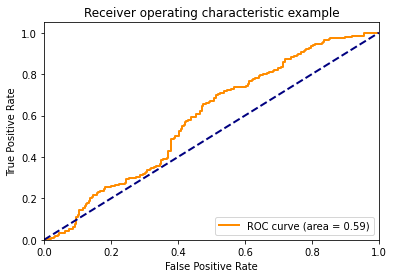

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, recall_score, accuracy_score, precision_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

STEP_SIZE_TEST=validation_generator.n//validation_generator.batch_size
validation_generator.reset()
preds = model.predict(validation_generator, verbose=1)

fpr, tpr, _ = roc_curve(validation_generator.classes, preds)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2

print('classfication report')
#print(str(np.mean(recall_score(validation_generator.classes, preds))))
#accuracy =(accuracy_score(validation_generator.classes, preds))*100
#print(str(accuracy))
#prec= np.mean(precision_score(validation_generator.classes, y_pred, average=None))*100
#print(str(prec))

print('fpr: '+str(np.mean(fpr)))
print('tpr: '+str(np.mean(tpr)))
precision = np.mean(tpr)/(np.mean(fpr)+np.mean(tpr))
print('precision: '+str(precision))
plt.plot(fpr, tpr, color='darkorange',
lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, recall_score, accuracy_score, precision_score
Y_pred = model.predict_generator(validation_generator,2) # class is 2
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(Y_pred)
print('y pred >>> git ')
print(y_pred)
#print(confusion_matrix(validation_generator.classes, y_pred))
print('classfication report')
#print(str(np.mean(recall_score(validation_generator.classes, y_pred, average=None))))
#accuracy =(accuracy_score(validation_generator.classes, y_pred))*100
#print(str(accuracy))
#prec= np.mean(precision_score(validation_generator.classes, y_pred, average=None))*100
#print(str(prec))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix
[[0.5675984 ]
 [0.7711857 ]
 [0.8296725 ]
 [0.96203715]
 [0.97850305]
 [0.09240711]
 [0.19640923]
 [0.25570062]
 [0.4946847 ]
 [0.7593213 ]
 [0.9043421 ]
 [0.8759984 ]
 [0.35001558]
 [0.46924266]
 [0.8274286 ]
 [0.6539191 ]
 [0.34270114]
 [0.6085692 ]
 [0.1329522 ]
 [0.8055015 ]]
y pred >>> git 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
classfication report
